- Reason for outliers
    - measurement or input error
    - Data Corruption
    - True outlier observation

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [4]:
np.random.seed(1)
data = 5*np.random.randn(10000)+50
print('mean:%.3f,stdv:%.3f'%(data.mean(),data.std()))


mean:50.049,stdv:4.994


## Standard Deviation Method

- 1 Standard Deviation from the mean :68%
- 2 Standard Deviation from the mean :95%
- 3 Standard Deviation from the mean covers 99.7% of data

A value that falls outside of 3 std is considered as outlier sometimes 4 std

<AxesSubplot:ylabel='Density'>

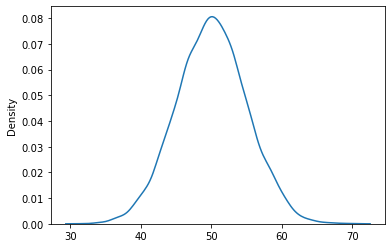

In [5]:
sns.kdeplot(data)

In [7]:
data_mean = data.mean()
data_std = data.std()
cutoff = data_std*3
upper = data_mean+cutoff
lower = data_mean-cutoff

In [10]:
outliers = [x for x in data if x>upper or x<lower]
len(outliers)

29

In [11]:
outliers_removed = [x for x in data if x>lower and x<upper]

<AxesSubplot:ylabel='Density'>

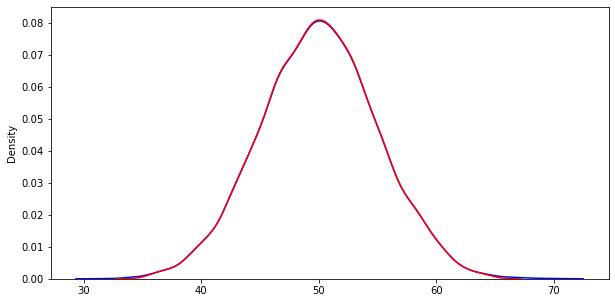

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.kdeplot(data,color='b')
sns.kdeplot(outliers_removed,color='r')

## Interquartile Range Method

IQR is defined as difference between 75th and 25th percentiles of data

<AxesSubplot:>

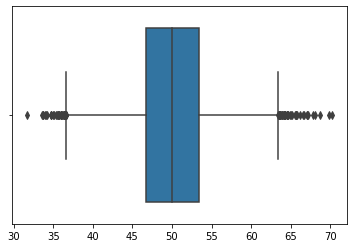

In [26]:
sns.boxplot(x = data,orient='Vertical')

outliers in interquartile range method can be identified usually with k factor as follows:

**lower range- q1-1.5IQR**

**upper range- q3+1.5IQR**

In [31]:
Q3,Q1 = np.percentile(data,75), np.percentile(data,25)
IQR = Q3-Q1
cut_off = IQR*1.5
lower,upper = Q1-cut_off,Q3+cut_off
print(Q3,Q1,IQR)

53.3590441773518 46.685375790489445 6.673668386862353


In [29]:
outliers = [x for x in data if x<lower or x>upper]
len(outliers)

81

In [30]:
outliers_removed = [x for x in data if x>lower and x<upper]
len(outliers_removed)

9919

## Automatic Outlier Detection

- An approach to tacle the outlier problem is one-class classification
- it involves fitting a model on the normal data and predicting whether new data is normal or an outlier
- A one-class classifier is fit on a training dataset that only has examples from the normal class. Once prepared, the model is used to classify new examples as either normal or not-normal, i.e. outliers or anomalies


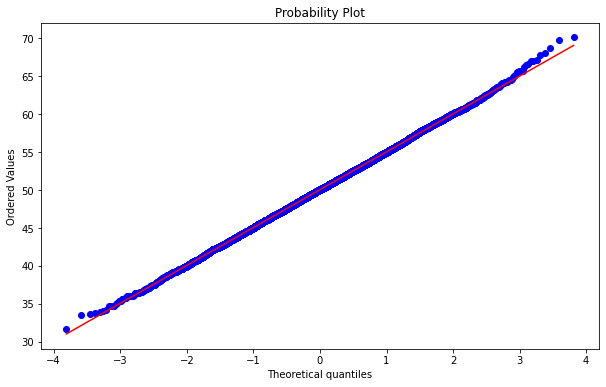

In [33]:
# pp plot to check the normality of data
plt.figure(figsize=(10,6))
st.probplot(data,dist='norm',plot=plt)
plt.show()

### local outlier factor class

- lof uses the distance of values in feature space
- it uses the idea of nearest neighbours for outlier detection
- each example is assigned a scoring of how isolated or how likely it is to be outliers based on size of its local neighbourhood

In [34]:
from sklearn.neighbors import LocalOutlierFactor 

In [38]:
data.shape

(10000,)

In [39]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(data.reshape(10000,1))

In [43]:
pd.Series(yhat).value_counts()

 1    9978
-1      22
dtype: int64

- outliers are marked as -1 which can be seen in the value counts where 22 values are detected as outliers

## Isolation Forest

- Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.

- It is based on modeling the normal data in such a way to isolate anomalies that are both few in number and different in the feature space.

- Isolation is a unsupervised algo

- generaly anamolies found by comparing it with distributed instances but isolation doesnt work the above methodology. It identifies outliers by isolating outliers in data

https://heartbeat.fritz.ai/isolation-forest-algorithm-for-anomaly-detection-2a4abd347a5

In [44]:
from sklearn.ensemble import IsolationForest

In [48]:
iso  = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(data.reshape(10000,1))

In [49]:
pd.Series(yhat).value_counts()

 1    9900
-1     100
dtype: int64

## Minimum Covariance Determinant
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

If the input variables have a Gaussian distribution, then simple statistical methods can be used to detect outliers.

For example, if the dataset has two input variables and both are Gaussian, then the feature space forms a multi-dimensional Gaussian and knowledge of this distribution can be used to identify values far from the distribution.

This approach can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier. An efficient implementation of this technique for multivariate data is known as the Minimum Covariance Determinant, or MCD for short.

In [50]:
from sklearn.covariance import EllipticEnvelope

In [51]:
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(data.reshape(10000,1))

In [52]:
pd.Series(yhat).value_counts()

 1    9900
-1     100
dtype: int64

In [53]:
data2 = 2*np.random.randn(10000)

In [59]:
pd.Series(data2).shape

(10000,)

In [64]:
df = pd.concat([pd.Series(data2),pd.Series(data)],axis=1)
df.columns = ['x','y']

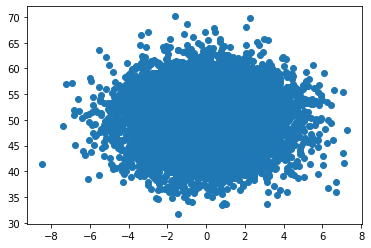

In [66]:
plt.scatter(df.x,df.y)

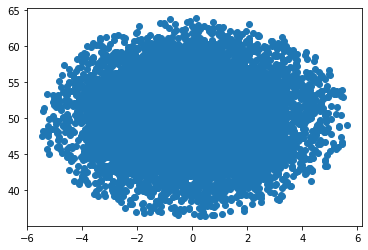

In [74]:
ee2 = EllipticEnvelope(contamination=0.02)
yhat = ee2.fit_predict(df)
mask = yhat[yhat==1]
df2 = df[yhat==1]
plt.scatter(df2.x,df2.y)

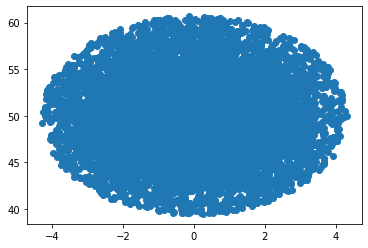

In [77]:
ee2 = EllipticEnvelope(contamination=0.10)
yhat = ee2.fit_predict(df)
mask = yhat[yhat==1]
df2 = df[yhat==1]
plt.scatter(df2.x,df2.y)

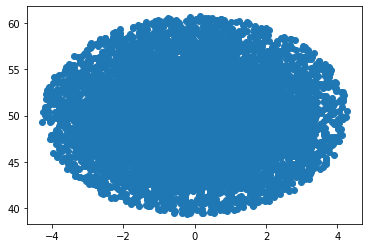

In [76]:
ee2 = EllipticEnvelope(contamination=0.10)
yhat = ee2.fit_predict(df)
mask = yhat[yhat==1]
df2 = df[yhat==1]
plt.scatter(df2.x,df2.y)

- we can see with increase in contamination the scatter plot shape is becoming more perfect to elliptical